In [4]:
import pandas as pd
csv_file = pd.read_csv('final-result.csv', index_col=False)
featurues = ['accessed_file','recvsaction_android.intent.action.UMS_DISCONNECTED','recvsaction_android.intent.action.ACTION_POWER_CONNECTED',
             'recvsaction_android.intent.action.ACTION_SHUTDOWN','recvsaction_android.provider.Telephony.SMS_RECEIVED',
             'recvsaction_android.intent.action.SIG_STR','recvsaction_com.android.vending.INSTALL_REFERRER',
             'recvsaction_android.intent.action.NEW_OUTGOING_CALL','recvsaction_android.provider.Telephony.WAP_PUSH_RECEIVED',
             'recvsaction_android.intent.action.BOOT_COMPLETED','recvsaction_android.intent.action.PHONE_STATE',
             'recvsaction_android.intent.action.PACKAGE_REMOVED','recvsaction_android.intent.action.USER_PRESENT',
             'data_leaks_count','tag_count','servicestart_found_com.android.mms.transaction.SmsReceiverService',
             'servicestart_found_com.android.contacts.ViewNotificationService','servicestart_found_com.android.battery.BridgeProvider',
             'servicestart_found_com.safetest.tractor.UpdateService','servicestart_found_com.android.providers.downloads.DownloadService',
             'servicestart_found_com.android.contacts.calllog.CallLogNotificationsService','servicestart_found_com.safetest.five.SoundService',
             'servicestart_found_com.geinimi.custom.GoogleKeyboard','tag_name_TAINT_LOCATION','tag_name_TAINT_CONTACTS','tag_name_TAINT_MIC',
             'tag_name_TAINT_PHONE_NUMBER','tag_name_TAINT_LOCATION_GPS','tag_name_TAINT_LOCATION_NET','tag_name_TAINT_LOCATION_LAST',
             'tag_name_TAINT_CAMERA','tag_name_TAINT_ACCELEROMETER','tag_name_TAINT_SMS','tag_name_TAINT_IMEI','tag_name_TAINT_IMSI',
             'tag_name_TAINT_ICCID','tag_name_TAINT_DEVICE_SN','tag_name_TAINT_ACCOUNT','tag_name_TAINT_BROWSER','tag_name_TAINT_OTHERDB',
             'tag_name_TAINT_FILECONTENT','tag_name_TAINT_PACKAGE','tag_name_TAINT_CALL_LOG','tag_name_TAINT_EMAIL','tag_name_TAINT_CALENDAR',
             'tag_name_TAINT_SETTINGS','fdaccess_pipe','fdaccess_cmdline','fdaccess_shared_prefs','fdaccess_dat','fdaccess_sdcard','fdaccess_info',
             'fdaccess_jar','fdaccess_db','fdaccess_txt','fdaccess_urandom','fdaccess_if_inet6','phonecalls','sendsms']
X = csv_file[featurues]
Y = csv_file.label

In [5]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)

<h3>Classification Accuracy: Percentage of correct prediction</h3>

In [2]:
#from sklearn.linear_model import LogisticRegression
#logreg = LogisticRegression()
#logreg.fit(x_train,y_train)
#y_predict= logreg.predict(x_test)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#------------------ Logistic Regression -------------------------
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
#------------------------------ SVM -----------------------------
C = 1.0  # SVM regularization parameter
svc      = SVC(C=C, kernel='linear', probability=True).fit(x_train,y_train)
rbf_svc  = SVC(C=C, kernel='rbf', probability=True).fit(x_train,y_train)
poly_svc = SVC(C=C, kernel='poly', probability=True, degree=3).fit(x_train,y_train)
#----------------- Predictions -----------------------------------
linear_predict = svc.predict(x_test)
rbf_predict = rbf_svc.predict(x_test)
poly_predict = poly_svc.predict(x_test)
y_predict= logreg.predict(x_test)

In [11]:
from sklearn import metrics
print metrics.accuracy_score(y_predict, y_test)
print metrics.accuracy_score(poly_predict, y_test)
print metrics.accuracy_score(poly_predict, y_test)
print metrics.accuracy_score(poly_predict, y_test)

0.908814589666
0.810030395137


### Null Accuracy: accuracy that could be achieved by always predicting the most frequent class

In [19]:
# calculate percentage of 1
y_test.mean()

0.4726443768996961

In [20]:
#calculate percentage of 0
print 1-y_test.mean()

0.5273556231


In [21]:
# Null Accuracy
max(y_test.mean(),1-y_test.mean())

0.5273556231003039

### compare <strong>true</strong> and <strong>predict</strong> response values

In [13]:
print 'True : ', y_test[0:29]
print 'Pred : ', y_predict[0:29]
print 'SVM poly Pred : ', poly_predict[0:29]
print 'SVM Linear Pred : ', rbf_predict[0:29]
print 'SVM RBF Pred : ', linear_predict[0:29]

True :  92      1
1655    0
1376    0
1936    0
2221    0
2311    0
2094    0
2576    0
2595    0
2398    0
224     1
1211    1
2460    0
53      1
746     1
276     1
1012    1
2255    0
878     1
2577    0
1385    0
2532    0
2434    0
306     1
2420    0
634     1
2145    0
192     1
2194    0
Name: label, dtype: int64
Pred :  [1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0]
SVM poly Pred :  [1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0]
SVM Linear Pred :  [1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0]
SVM RBF Pred :  [1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0]


### Confusion Matrix

In [23]:
confusion_matrics = metrics.confusion_matrix(y_test, y_predict)
print confusion_matrics
TP = confusion_matrics[1,1]
TN = confusion_matrics[1,0]
FP = confusion_matrics[0,1]
FN = confusion_matrics[1,0]



confusion_matrics = metrics.confusion_matrix(y_test, y_predict)
print confusion_matrics
linear_TP = confusion_matrics[1,1]
linear_TN = confusion_matrics[1,0]
FP = confusion_matrics[0,1]
FN = confusion_matrics[1,0]

[[325  22]
 [ 38 273]]


## Metrics computed from computed matrix <h4>Classification Accuracy: Overall, how often is classifier correct</h4>

In [24]:
print (TP+TN)/float(TP+TN+FP+FN)
print metrics.accuracy_score(y_test, y_predict)

0.838274932615
0.908814589666


<h4>Classification Error: Overall, how often is classifier incorrect?</h4>

In [25]:
print (FP+FN)/float(TP+TN+FP+FN)
print 1- metrics.accuracy_score(y_test, y_predict)

0.161725067385
0.0911854103343


<h4>False Positive Rate</h4>

In [26]:
print FP/float(TN +FP)

0.366666666667


<h4>True Positive Rate</h4>

In [27]:
print TP/float(TN +FP)

4.55


<h4>Precision Score</h4>

In [28]:
print TP/float(TP +FP)
print metrics.precision_score(y_test, y_predict)

0.925423728814
0.925423728814


# Adjusting the Classification Threshold

In [29]:
print logreg.predict(x_test)[0:20]

[1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0]


In [49]:
# print the first 10 predicated probabilities
logreg.predict_proba(x_test)[0:20,1]

array([ 0.95644196,  0.27363169,  0.01363429,  0.27363169,  0.01035165,
        0.30444042,  0.27363169,  0.27363169,  0.01035165,  0.27363169,
        0.71582166,  0.99602328,  0.01035165,  0.69851646,  0.9425236 ,
        0.98072181,  0.97482947,  0.01035165,  0.98680805,  0.01035165])

In [31]:
y_pred_proba = logreg.predict_proba(x_test)[:, 1]

y_pred_proba = poly_svc.predict_proba(x_test)[:, 1]

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size']=12

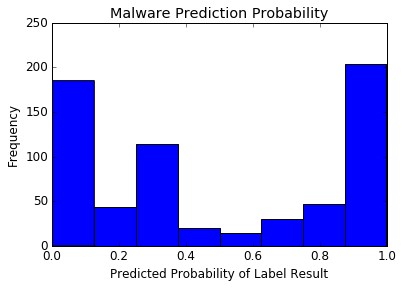

In [68]:
plt.hist(y_pred_proba, bins=8)
plt.xlim(0,1)
plt.title('Malware Prediction Probability')
plt.xlabel('Predicted Probability of Label Result')
plt.ylabel('Frequency')

## Decrease the threshold value to increase sensitivity of the classifier

In [64]:
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_proba, 0.4)
# Set the threshold value to 0.4

In [65]:
y_pred_proba[0:30]

array([ 0.95644196,  0.27363169,  0.01363429,  0.27363169,  0.01035165,
        0.30444042,  0.27363169,  0.27363169,  0.01035165,  0.27363169,
        0.71582166,  0.99602328,  0.01035165,  0.69851646,  0.9425236 ,
        0.98072181,  0.97482947,  0.01035165,  0.98680805,  0.01035165,
        0.01363429,  0.01035165,  0.00936802,  0.85276895,  0.01559365,
        0.95679699,  0.00936802,  0.80538751,  0.00936802,  0.16117425])

In [66]:
y_pred_class
print confusion_matrics

[[325  22]
 [ 38 273]]


In [72]:
#print metrics.confusion_matrix(y_test, y_pred_class)

# ROC Curve and AUC Curve

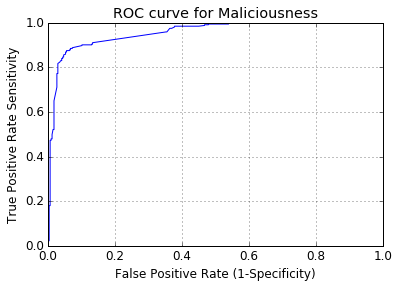

In [69]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr,tpr)
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.title('ROC curve for Maliciousness')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate Sensitivity')
plt.grid(True)

# AUC

In [70]:
print metrics.roc_auc_score(y_test,y_pred_proba)

0.954497437846


In [44]:
test_case = [1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0]
logreg.predict(test_case)

array([1], dtype=int64)

# F1 Score

In [62]:
from sklearn.metrics import f1_score
f1_score(y_test, y_predict, average=None)

array([ 0.91549296,  0.9009901 ])